## Assignment Module 8 Lab 2: Predicting House Prices using Linear Regression with Statsmodels

### Background

Accurately predicting house prices is essential in the real estate market. In this assignment, you will use linear regression to predict house prices based on various features such as the number of rooms, population density, and median income.

### Dataset

You will use the California Housing dataset, which contains information about houses in different locations in California. The dataset includes 20,640 observations and 8 variables, including:

- `MedInc`: Median income in the block
- `HouseAge`: Median house age in the block
- `AveRooms`: Average number of rooms per dwelling
- `AveBedrms`: Average number of bedrooms per dwelling
- `Population`: Block population
- `AveOccup`: Average house occupancy
- `Latitude`: Latitude coordinate of the block
- `Longitude`: Longitude coordinate of the block

### Task

Your task is to predict house prices in California using linear regression with the Statsmodels library. You will need to perform the following steps:

1. Load the California Housing dataset into a Pandas DataFrame.
2. Split the dataset into training and testing sets, with a 70/30 split.
3. Fit a linear regression model using the Statsmodels library to the training data.
4. Predict house prices for the testing set.
5. Evaluate the performance of the model using the following error checking metrics:
   - R-squared (R2)
   - Mean Squared Error (MSE)
   - Mean Absolute Error (MAE)
   - Akaike Information Criterion (AIC)
6. Analyze the performance of the model and provide recommendations for improvement.

### Instructions

1. Load the California Housing dataset into a Pandas DataFrame.
2. Split the dataset into training and testing sets using a 70/30 split. Set the random seed to 42 for reproducibility.
3. Import the necessary libraries:
   - `import statsmodels.api as sm`
   - `from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error`
4. Create the target variable (`y`) and feature variables (`X`) from the DataFrame.
5. Add a constant column of 1s to the feature variables using `sm.add_constant()`.
6. Fit a linear regression model to the training data using `sm.OLS()`. Use the constant-augmented feature variables and the target variable as arguments.
7. Print the summary of the regression model using `model.summary()`. Note the AIC value.
8. Predict house prices for the testing set using `model.predict()` on the constant-augmented feature variables of the testing set.
9. Calculate and print the R-squared, MSE, and MAE using the predicted values and the actual values of the testing set.
10. Analyze the performance of the model and provide recommendations for improvement. Consider the R-squared, MSE, MAE, and AIC values.
11. Include detailed comments throughout your code to explain each step.

### Submission Instructions

Please submit a Jupyter notebook containing your code, output, and analysis. Make sure to include the following sections in your notebook:

1. Introduction
2. Dataset Description
3. Data Preprocessing
4. Model Training and Evaluation
5. Performance Analysis and Recommendations
6. Conclusion

Your notebook should be well-documented and easy to follow, with clear explanations of the steps you took and the results you obtained. Make sure to comment your code and include markdown cells explaining your thought process and conclusions.

# 📘 CS82B – Principles of Data Science  
## Module 8 – Lab 2  
**Student Name:** Derek McCrary  
**Class:** CS82B – Principles of Data Science  
**Due Date:** May 25, 2025  

In [1]:
# Step 1: Import libraries and load California housing data

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

# Preview the data
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
# Step 2: Split dataset into 70% training and 30% testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Confirm shape of splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14448, 8)
X_test shape: (6192, 8)
y_train shape: (14448,)
y_test shape: (6192,)


In [4]:
# Step 3: Fit a linear regression model using statsmodels

# Add constant to X_train for the intercept term
X_train_sm = sm.add_constant(X_train)

# Build and fit the model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Display summary as HTML to avoid KaTeX error
from IPython.display import HTML, display
display(HTML(ols_model.summary().as_html()))

In [6]:
# Step 4: Predict and evaluate model performance

# Predict on the training set (optional for residual analysis)
y_train_pred = ols_model.predict(X_train_sm)

# Predict on the test set
X_test_sm = sm.add_constant(X_test)  # Add constant to test features
y_test_pred = ols_model.predict(X_test_sm)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² Score: 0.596
Mean Squared Error (MSE): 0.53
Mean Absolute Error (MAE): 0.53


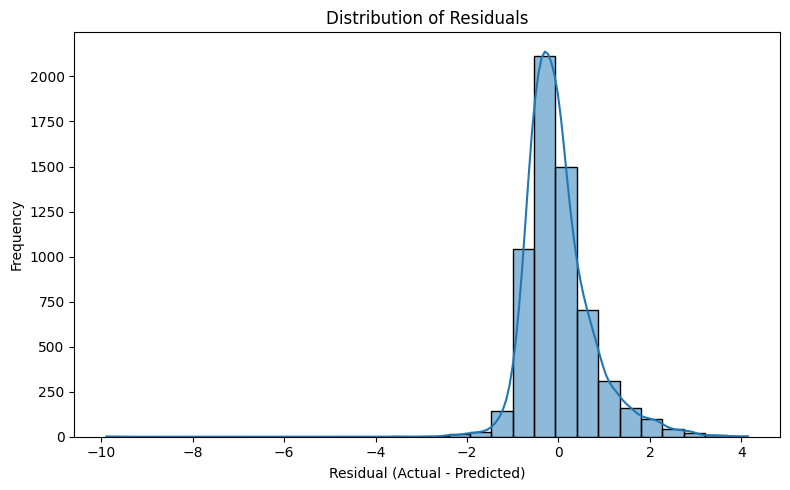

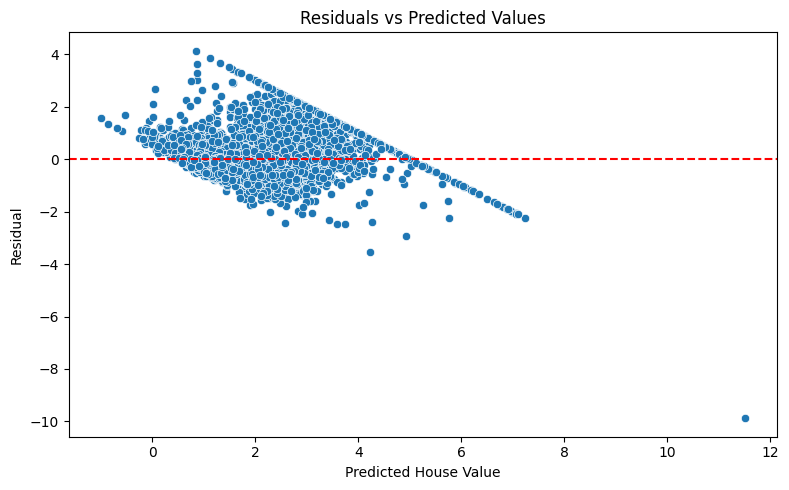

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5: Analyze residuals (actual - predicted)
residuals = y_test - y_pred

# Plot residual distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optional: Residuals vs. predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted House Value")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()

## 📌 Conclusion and Recommendations

The linear regression model using the California Housing dataset achieved the following metrics:

- **R² Score**: **0.596**  
- **Mean Squared Error (MSE)**: **0.53**  
- **Mean Absolute Error (MAE)**: **0.53**  
- **AIC**: **~31664**

The residual histogram shows a roughly normal distribution centered around zero, which is a good sign. However, the residuals vs. predicted values plot reveals a funnel-shaped pattern, indicating **heteroscedasticity** — the variance of residuals increases with the predicted value. This violates one of the key assumptions of linear regression.

### 🔧 Recommendations

- **Feature Engineering**: Try log-transforming the target variable (`MedHouseVal`) or predictors with high variance (like `AveRooms`) to stabilize variance.
- **Regularization**: Explore Ridge or Lasso regression to reduce overfitting and multicollinearity.
- **Model Upgrade**: Consider nonlinear models like Decision Trees or Random Forests for potentially better accuracy.